#### whenever a data is collected over a period of Time, that is basically known as Time Series 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### dataset link---> https://www.kaggle.com/dougcresswell/daily-total-female-births-in-california-1959

In [3]:
f_birth=pd.read_csv('F:\Time_Series Data Analysis\data science Tutorials/daily-total-female-births-CA.csv',parse_dates=[0],index_col=0)

In [4]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [5]:
### series is something u need for day-time series analysis
### but working with dataframes are far more easier than working with series

In [6]:
### how to convert dataframe into series
    ## 1.first is by passing squeeze=True in read.csv( squeeze=True)
    ## 2.using dataframe.values, we get array which my algo needs

In [7]:
f=pd.read_csv('F:\Time_Series Data Analysis\data science Tutorials/daily-total-female-births-CA.csv', index_col=[0], parse_dates=[0], squeeze =True)
f

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, Length: 365, dtype: int64

In [8]:
type(f)

pandas.core.series.Series

In [9]:
bb=f_birth.values
bb

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [10]:
type(bb)

numpy.ndarray

In [11]:
### to get size of dataframe
f_birth.size

365

#### getting distribution of data to check whether I have any outlier or not

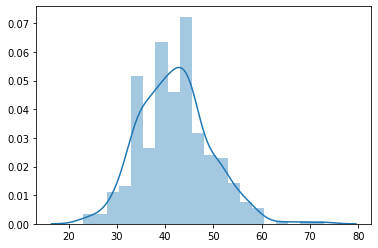

In [12]:
import seaborn as sns
sns.distplot(f_birth)

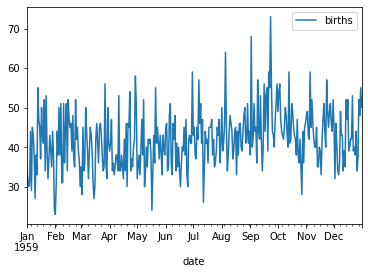

In [13]:
### if we want to plot with respect to time or index , we can use df.plot()
f_birth.plot()

#### this somehow a very stationery series data, what exactly is a stationery data, so data that has no trend no that has constant mean & std dev throughout data

In [14]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [15]:
f_birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [16]:
f_birth_mean=f_birth.rolling(window=20).mean()

In [17]:
f_birth_mean.head(30)

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
1959-01-06,NaN
1959-01-07,NaN
1959-01-08,NaN
1959-01-09,NaN


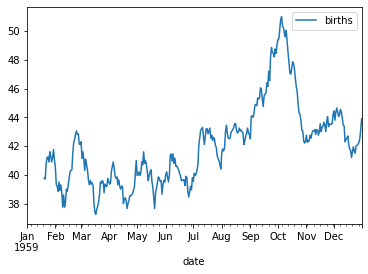

In [18]:
### plotting moving average
f_birth_mean.plot()

#### in this plot, we will see we have a spike over here in OCT & then it comes down, if we will see there is a very less trend here at all


#### in a similar way, i can play with window perimeter as well as window=5 or window=10

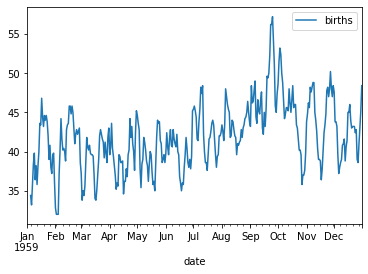

In [19]:
f_birth.rolling(window=5).mean().plot()

####  this technique has already used lots of time in Stock Market & stock Analyst used basically Moving average to remove such noise in data


#### types of models in Time-Series :
     1.Base line model
     2.Exponential model
     3.AR model
     4.MA model
     5.ARIMA model
     6.SARIMA model(Seasonal ARIMA)

#### baseline model=naive model in which , we assume as lets say today no of births is somewhere around 41,so we assume as tommorow also we get 41 births

     summary for baseline:--> the recent history is a best refection of the future

with this series bb, we will create one more value which will take next value from the existing data-series..


#### bb--> current series
#### & for the next series, we can call shift operation on existing series

##### then we have to concat both series ,but very first we have to convert bb it into dataframe, bcz we can call shift only on our dataframe


In [20]:
value=pd.DataFrame(bb)

In [21]:
birth_df=pd.concat([value,value.shift(1)],axis=1)
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [22]:
birth_df.columns=['actual_birth','forecast_birth']

In [23]:
birth_df.head(20)

,actual_birth,forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0
6,45,29.0
7,43,45.0
8,38,43.0
9,27,38.0


##### or what we guyss we can do we can directly call this shift function on our f_birth to predict value, thats a another way of doing it

#### Once we have done this, now we have to identify errors so there are 2 ways to figure out the error
     1.Either u can figure it out on complete dataset
     2.or we can use train_test_split
     
but in this train_test_split doesnt makes sense bcz this is a naive model,previous value is used for current value
I will both the approches, and its upto what we exacty want.. if data is small, like we have 300 observations we can do it on entire data, but if it is having lets say 30000 entries , in such, it is not advisable we just take a partial data by doing some sampling or directly taking it & then go ahead & use the error.. 

we can computer error by importing mean_squared_error module


In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
### then check accuracy
np.sqrt(mean_squared_error(birth_df['forecast_birth'][1:],birth_df['actual_birth'][1:]))

9.177283229394606

####  why np.sqrt, bcz  mean_squared_error  gives square of error , and then by calling np.sqrt we get actual error

#### if we have outlier in data, This error will increase, dats why we have to deal with outlier

#### using Base-line, we can say using this basic technique we are getting error of 9 births every day, it means error of +-9 is going to happen in your prediction

#### ACF,PACF

In [26]:

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot

#### to get your q value for your ARIMA ,i am going to visualise Auto-corelation chart

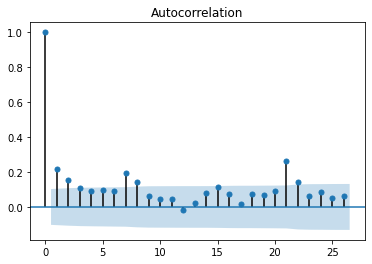

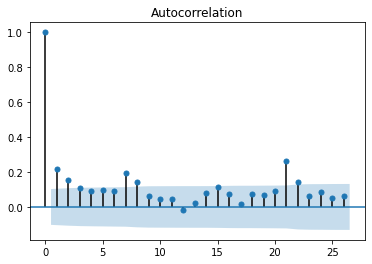

In [27]:
plot_acf(f_birth) ## p=2,3

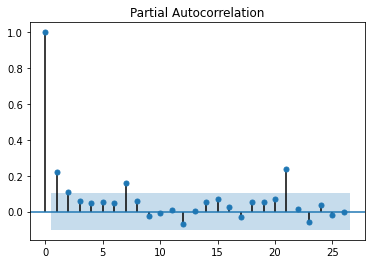

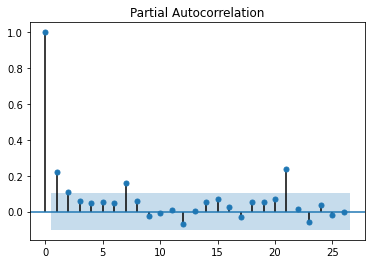

In [28]:
plot_pacf(f_birth) ## gives vbalue of q=(3,4)

In [29]:
training_data=f_birth[0:320]
test_data=f_birth[320:]
### create test that is basically unseen to our model, or which is basocally is used for evalaution

In [30]:
training_data.size

320

In [31]:
test_data.size

45

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
### arima= ARIMA(training_data,order=(p,d,q))

arima= ARIMA(training_data,order=(2,1,3))

C:\Users\mcr\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\mcr\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [34]:
### then doing model.fit ie fitting our model to data
model=arima.fit()

In [35]:
model.aic

2164.700025508478

In [36]:
pred= model.forecast(steps=45)[0]

In [37]:
pred

array([43.11819215, 44.26392629, 43.64786207, 43.03747563, 44.0806814 ,
       43.97670631, 43.10917132, 43.84816621, 44.19618218, 43.30274198,
       43.63438843, 44.28805863, 43.56679434, 43.49198806, 44.2643378 ,
       43.84351657, 43.44959365, 44.1596409 , 44.0820681 , 43.50973978,
       44.02004897, 44.24824448, 43.65269193, 43.89136884, 44.32898152,
       43.84437578, 43.80942045, 44.33160219, 44.04603501, 43.7940763 ,
       44.27884637, 44.22327109, 43.84769545, 44.20144747, 44.35264253,
       43.9575505 , 44.13024792, 44.42482605, 44.10106258, 44.08961034,
       44.44424113, 44.25225942, 44.09331119, 44.42580973, 44.3878761 ])

In [38]:
test_data

,births
date,
1959-11-17,33
1959-11-18,42
1959-11-19,47
1959-11-20,51
1959-11-21,44
1959-11-22,40
1959-11-23,57
1959-11-24,49
1959-11-25,45


In [39]:
#### now we can compare our prediction in some cases, we are doing very well whereas in some cases, we are not doing good prediction

In [40]:
np.sqrt(mean_squared_error(test_data,pred))

6.613037458913119

#### now u will see it is better than the model that we have created as Error decreases from 9 to 6.6

### and in the future we are going to play with diff pairs of (P,d,q) or we can choose best pair by just automating it using Hyperparameter tuning

### part-2 Time Series Analysis Python

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
f_birth=pd.read_csv('F:\Time_Series Data Analysis\data science Tutorials/daily-total-female-births-CA.csv',parse_dates=[0],index_col=0)

In [43]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


#### Normalization- useful in 2 cases- 
      1. if ur data is on different scale, Lets say height of 100 students are on different scale then in such scenario, we can bring our data to same scale,after normalize our data comes in a range of [0,1]
      
      2.bcz some algo works better work better if ur data is normalized lets say Linear Regression, Logistic Regression

#### normalization= (xi-min) / (max-min), we can create our own function to perform normalization but scikit provides us in-built func to perform normalization

In [44]:
f_birth.min()

births    23
dtype: int64

In [45]:
f_birth.max()

births    73
dtype: int64

In [46]:
f_birth

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [47]:
(35-23)/(72-23)

0.24489795918367346

##### 35 getting normalized to 0.24489

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
data=f_birth.values

###### as MinMaxScaler receives Data in the form of array

In [50]:
scaler=MinMaxScaler()

In [51]:
birth_normalize=scaler.fit_transform(f_birth)

In [52]:
birth_normalize

array([[0.24],
       [0.18],
       [0.14],
       [0.16],
       [0.42],
       [0.12],
       [0.44],
       [0.4 ],
       [0.3 ],
       [0.08],
       [0.3 ],
       [0.2 ],
       [0.64],
       [0.48],
       [0.44],
       [0.28],
       [0.54],
       [0.4 ],
       [0.36],
       [0.58],
       [0.22],
       [0.6 ],
       [0.32],
       [0.18],
       [0.28],
       [0.4 ],
       [0.32],
       [0.24],
       [0.42],
       [0.3 ],
       [0.02],
       [0.  ],
       [0.16],
       [0.42],
       [0.3 ],
       [0.54],
       [0.3 ],
       [0.56],
       [0.16],
       [0.16],
       [0.56],
       [0.26],
       [0.44],
       [0.56],
       [0.22],
       [0.58],
       [0.48],
       [0.44],
       [0.46],
       [0.32],
       [0.5 ],
       [0.28],
       [0.24],
       [0.58],
       [0.38],
       [0.44],
       [0.32],
       [0.28],
       [0.14],
       [0.24],
       [0.1 ],
       [0.44],
       [0.22],
       [0.26],
       [0.54],
       [0.42],
       [0.

In [53]:
birth_normalize[0]

array([0.24])

##### so now my data has been normalized so nowe are rady to insert this data into algorithm

In [54]:
training_data=birth_normalize[0:320]
test_data=birth_normalize[320:]

In [55]:
training_data.size

320

In [56]:
test_data.size

45

In [57]:
from statsmodels.tsa.arima_model import ARIMA


In [58]:
### arima= ARIMA(training_data,order=(p,d,q))

arima= ARIMA(training_data,order=(2,1,3))

In [59]:
model=arima.fit()

C:\Users\mcr\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [60]:
model.aic

-325.955725078043

#### now we will see -ve aic, earlier we have positive aic

In [61]:
pred= model.forecast(steps=45)[0]

In [62]:
pred

array([0.39993182, 0.41298825, 0.41447656, 0.40199793, 0.40499743,
       0.41700022, 0.41119326, 0.40192801, 0.4110888 , 0.41810889,
       0.40777774, 0.40473263, 0.41644852, 0.41662979, 0.40585153,
       0.40961813, 0.41973087, 0.41374084, 0.40637596, 0.41514647,
       0.42042779, 0.4109984 , 0.40938109, 0.41978891, 0.41896768,
       0.4097669 , 0.41404003, 0.42246075, 0.41648278, 0.41076648,
       0.41903154, 0.42285445, 0.41435531, 0.41388353, 0.42303997,
       0.4214749 , 0.41371878, 0.41828564, 0.42520776, 0.41939172,
       0.41509025, 0.42277353, 0.42538913, 0.4178196 , 0.41824835])

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
np.sqrt(mean_squared_error(test_data,pred))

0.13100596695951017

#### very less error

#### now to get your actual forecast, u have to perform inverse transformation

In [65]:
actual_forecast=scaler.inverse_transform(pred.reshape(-1,1))

In [66]:
actual_forecast

array([[42.99659081],
       [43.64941247],
       [43.72382794],
       [43.09989665],
       [43.24987149],
       [43.85001076],
       [43.55966322],
       [43.09640055],
       [43.55443998],
       [43.90544458],
       [43.38888685],
       [43.23663138],
       [43.82242615],
       [43.83148939],
       [43.29257647],
       [43.48090675],
       [43.98654375],
       [43.68704194],
       [43.31879803],
       [43.75732332],
       [44.02138945],
       [43.54991975],
       [43.46905472],
       [43.98944539],
       [43.94838376],
       [43.48834488],
       [43.70200159],
       [44.12303747],
       [43.82413884],
       [43.5383238 ],
       [43.95157721],
       [44.14272249],
       [43.71776552],
       [43.69417667],
       [44.15199852],
       [44.07374498],
       [43.6859389 ],
       [43.91428221],
       [44.26038793],
       [43.9695859 ],
       [43.75451258],
       [44.13867674],
       [44.26945629],
       [43.89097998],
       [43.91241738]])

##### to get your actual error

In [67]:
np.sqrt(mean_squared_error(scaler.inverse_transform(test_data),actual_forecast))

6.550298347975507

##### now we will see whether after Data transformation our error reduces just a little bit

#### now we will come to standarization, much more advance than Normalization

##### standarization--> (xi-mean/S.D)
##### whenever we have the data that is out of range, in such we can use Standarization Lets say Data in which we have upwards & downwards trend, in such we can use Standarization whereas Normalization expects it to be between range


In [68]:
f_birth

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [69]:
np.mean(f_birth)

births    41.980822
dtype: float64

In [70]:
np.std(f_birth)

births    7.338184
dtype: float64

In [71]:
###for 35 births--> 
(35-41.9)/7.33

-0.9413369713506137

#### whenever we are going to perform standardization, make sure data follows Gaussian/Normal Distribution

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler2=StandardScaler()

In [74]:
stdvalue=scaler2.fit_transform(f_birth)

In [75]:
stdvalue

array([[-9.51300994e-01],
       [-1.36012148e+00],
       [-1.63266846e+00],
       [-1.49639497e+00],
       [ 2.75160452e-01],
       [-1.76894196e+00],
       [ 4.11433946e-01],
       [ 1.38886958e-01],
       [-5.42480512e-01],
       [-2.04148895e+00],
       [-5.42480512e-01],
       [-1.22384798e+00],
       [ 1.77416889e+00],
       [ 6.83980934e-01],
       [ 4.11433946e-01],
       [-6.78754006e-01],
       [ 1.09280142e+00],
       [ 1.38886958e-01],
       [-1.33660030e-01],
       [ 1.36534840e+00],
       [-1.08757449e+00],
       [ 1.50162190e+00],
       [-4.06207018e-01],
       [-1.36012148e+00],
       [-6.78754006e-01],
       [ 1.38886958e-01],
       [-4.06207018e-01],
       [-9.51300994e-01],
       [ 2.75160452e-01],
       [-5.42480512e-01],
       [-2.45030943e+00],
       [-2.58658292e+00],
       [-1.49639497e+00],
       [ 2.75160452e-01],
       [-5.42480512e-01],
       [ 1.09280142e+00],
       [-5.42480512e-01],
       [ 1.22907491e+00],
       [-1.4

In [76]:
training_data=stdvalue[0:320]
test_data=stdvalue[320:]

In [77]:
from statsmodels.tsa.arima_model import ARIMA
arima= ARIMA(training_data,order=(2,1,3))

In [78]:
model=arima.fit()

In [79]:
model.aic

893.1076926813676

#### high value of aic

In [80]:
pred= model.forecast(steps=45)[0]

In [81]:
pred

array([0.1547331 , 0.31083971, 0.22693397, 0.1437432 , 0.28586524,
       0.27172694, 0.15351576, 0.25418277, 0.30161849, 0.17988933,
       0.22505606, 0.31412675, 0.21586228, 0.205655  , 0.31088783,
       0.25355929, 0.19987855, 0.29661856, 0.28605501, 0.20807128,
       0.27759643, 0.3086904 , 0.22754453, 0.26006136, 0.31968606,
       0.25365643, 0.24889282, 0.32003965, 0.28112741, 0.24679799,
       0.31284885, 0.30527145, 0.25409839, 0.30230026, 0.32289503,
       0.26906048, 0.29259551, 0.33272769, 0.28860862, 0.28705368,
       0.33537107, 0.30920474, 0.28755195, 0.33285757, 0.32767928])

##### now to get your actual forecast, u have to perform inverse transformation¶

In [82]:
actual_forecast=scaler2.inverse_transform(pred.reshape(-1,1))

In [83]:
actual_forecast

array([[43.11628189],
       [44.26182095],
       [43.64610518],
       [43.03563598],
       [44.07855369],
       [43.97480428],
       [43.10734883],
       [43.84606187],
       [44.19415397],
       [43.30088297],
       [43.63232473],
       [44.28594183],
       [43.56485911],
       [43.48995622],
       [44.26217406],
       [43.84148667],
       [43.44756754],
       [44.15746353],
       [44.07994627],
       [43.50768732],
       [44.01787562],
       [44.24604892],
       [43.65058559],
       [43.88920007],
       [44.32673713],
       [43.84219953],
       [43.80724331],
       [44.32933183],
       [44.04378662],
       [43.791871  ],
       [44.27656437],
       [44.22096008],
       [43.84544268],
       [44.19915693],
       [44.35028511],
       [43.95523726],
       [44.12794166],
       [44.422439  ],
       [44.09868516],
       [44.08727469],
       [44.4418366 ],
       [44.24982322],
       [44.09093113],
       [44.42339209],
       [44.38539282]])

In [84]:
np.sqrt(mean_squared_error(scaler2.inverse_transform(test_data),actual_forecast))

6.612919739391905

#### Error doesnt change a bit more
    now we will see this technique is not working well with respect to Time Series 

In [85]:
### feature engineering

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
f_birth=pd.read_csv('F:\Time_Series Data Analysis\data science Tutorials/daily-total-female-births-CA.csv',parse_dates=[0],index_col=0)

In [88]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [89]:
f_birth['lag1']=f_birth.shift(1)

In [90]:
f_birth.head()

,births,lag1
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [91]:
f_birth['lag2']=f_birth['births'].shift(2)

In [92]:
f_birth['lag3']=f_birth['births'].shift(3)

In [93]:
f_birth.head()

,births,lag1,lag2,lag3
date,,,,
1959-01-01,35,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN
1959-01-03,30,32.0,35.0,NaN
1959-01-04,31,30.0,32.0,35.0
1959-01-05,44,31.0,30.0,32.0


#### moving average

In [94]:
f_birth['MA3']=f_birth['births'].rolling(window=3).mean()

# window: This is the number of observations used for calculating the statistic. 

In [95]:
f_birth.head()

,births,lag1,lag2,lag3,MA3
date,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333
1959-01-04,31,30.0,32.0,35.0,31.000000
1959-01-05,44,31.0,30.0,32.0,35.000000


In [96]:
f_birth['MA4']=f_birth['births'].rolling(window=4).mean()


In [97]:
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4
date,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25


In [98]:
##### lets day u r expertise in any area & u kmow within 7 days, the maximum value is the true reflector of our business as we are in high growth era
##### & minimum value is a true reflector of our baseline, so in such case instead of mean , u can call min & max function


In [99]:
#### lets say 5 is the window size or 5 is the business period
f_birth['MAX_5']=f_birth['births'].rolling(window=5).max()
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MAX_5
date,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,44.0


In [100]:
f_birth['MIN_5']=f_birth['births'].rolling(window=5).min()
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MAX_5,MIN_5
date,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,44.0,30.0


In [1]:
### now we will see just having a basic knowledge of Lag and some subject matter expertise, we can create so many variables

In [ ]:
###### to more u will dig in data & business,more u will figure it about feature enginering
###### u can say ,feature engineering is a most creative part apart from intrepreting the model

In [101]:
### lets say to capture day from date

In [102]:
f_birth['day']=f_birth.index.day

In [103]:
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MAX_5,MIN_5,day
date,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN,2
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN,3
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN,4
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,44.0,30.0,5


In [104]:
f_birth['month']=f_birth.index.month

In [105]:
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MAX_5,MIN_5,day,month
date,,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN,3,1
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN,4,1
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,44.0,30.0,5,1


#### we can also create dummy variable if we want to explore our data more

In [106]:
f_birth['year']=f_birth.index.year

In [107]:
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MAX_5,MIN_5,day,month,year
date,,,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1959
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1959
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN,3,1,1959
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN,4,1,1959
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,44.0,30.0,5,1,1959


In [108]:
#### remove na values

In [109]:
f_birth.dropna()

,births,lag1,lag2,lag3,MA3,MA4,MAX_5,MIN_5,day,month,year
date,,,,,,,,,,,
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,44.0,30.0,5,1,1959
1959-01-06,29,44.0,31.0,30.0,34.666667,33.50,44.0,29.0,6,1,1959
1959-01-07,45,29.0,44.0,31.0,39.333333,37.25,45.0,29.0,7,1,1959
1959-01-08,43,45.0,29.0,44.0,39.000000,40.25,45.0,29.0,8,1,1959
1959-01-09,38,43.0,45.0,29.0,42.000000,38.75,45.0,29.0,9,1,1959
...,...,...,...,...,...,...,...,...,...,...,...
1959-12-27,37,34.0,44.0,38.0,38.333333,38.25,44.0,34.0,27,12,1959
1959-12-28,52,37.0,34.0,44.0,41.000000,41.75,52.0,34.0,28,12,1959
1959-12-29,48,52.0,37.0,34.0,45.666667,42.75,52.0,34.0,29,12,1959


### 4. Stationery Time series Testing

#### test whether your time-series has been stationery or not
#### bcz stationery time-series helps us to make prediction better
#### stationery is all about when ur  mean & variance is constant over a period of time

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
f_birth=pd.read_csv('F:\Time_Series Data Analysis\data science Tutorials/daily-total-female-births-CA.csv',parse_dates=[0],index_col=0)

In [112]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


#### getting trend

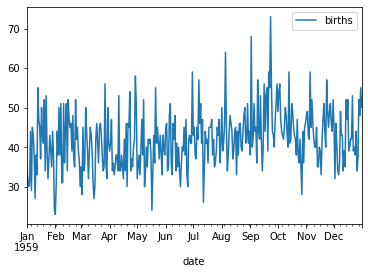

In [113]:
f_birth.plot()

#### now here we will see there is a bit of trend or seasonality here, as varaince is not constamt here
#### from this we will visualise it doesnt have a srong seasonlity but a bit of seasonality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000052E6234708>]],
      dtype=object)

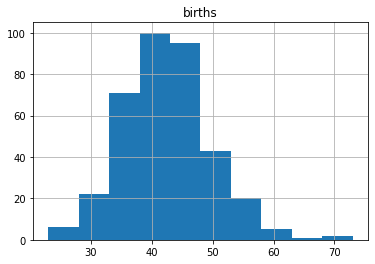

In [114]:
f_birth.hist()

#### looks to normal distribution but little bit skewes to right side

In [115]:
f_birth_1=f_birth[0:201]
f_birth_2=f_birth[201:]

In [116]:
f_birth_1.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [117]:
f_birth_2.head()

,births
date,
1959-07-21,47
1959-07-22,38
1959-07-23,42
1959-07-24,35
1959-07-25,36


In [118]:
f_birth_1.mean()

births    40.024876
dtype: float64

In [119]:
f_birth_2.mean()

births    44.378049
dtype: float64

#### we know our assumption for our stationery time-series is that mean should be same, but here mean is variating

### so we can say it is not stationery  lets run another test to check whether it is stationery or not

In [120]:
f_birth_1.var()

births    49.314378
dtype: float64

In [121]:
f_birth_2.var()

births    49.573994
dtype: float64

#### hence by visualsing graph we can conclude yahh it has a bit of seasonality with a constant variance

### Next is Dickey Fuller Test

    ##### dickery fuller test or Augumented Dickey Fuller(adfuller) test, so this test basically tells us how strongly Time-series is defined by  a trend

In [ ]:
#### adfuller gives 5 values ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
#most imp is p-value
#this is almost similar to Hypothesis testing,whereas Null hypo which says Data is not Stationery
#whereas Alternate hypo says data is stationery

#lags are those which are our previous Data

In [122]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#### apply adfuller on dataframe

In [126]:

def adfuller_test(df):
    result=adfuller(df)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    #Ho: ie null hypoIt is non stationary
#H1: ie Alternate Hypo ,It is stationary
#zip basically combines result,labels


In [127]:
adfuller_test(f_birth_2)


ADF Test Statistic : -10.106731708808702
p-value : 1.0252546560573777e-17
#Lags Used : 0
Number of Observations Used : 163
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
#adfuller gives 5 values ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
#most imp is p-value
#this is almost similar to Hypothesis testing,whereas Null hypo which says Data is not Stationery
#whereas Alternate hypo says data is stationery


In [ ]:
if Pvalue<0.05 ,we reject Null hypo ie alternate hypo is true,ie data is stationery

### tune your parameter of time-series (Hyper-parameter Tuning)

#### all about playing with params (P,d,q) so whichever pair will give less error select those pair

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.arima_model import ARIMA

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
f_birth=pd.read_csv('F:\Time_Series Data Analysis\data science Tutorials/daily-total-female-births-CA.csv',parse_dates=[0],index_col=0)

In [5]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [5]:
#### now define hyper-para=meters 
p_values=range(0,8)
d_values=range(0,3)
q_values=range(0,5)


In [8]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            print((order))

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 0, 4)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(1, 2, 4)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 0, 3)
(2, 0, 4)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(2, 2, 4)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)
(3, 0, 3)
(3, 0, 4)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(3, 2, 0)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 2, 4)
(4, 0, 0)
(4, 0, 1)
(4, 0, 2)
(4, 0, 3)
(4, 0, 4)
(4, 1, 0)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)
(4, 2, 0)
(4, 2, 1)
(4, 2, 2)
(4, 2, 3)
(4, 2, 4)
(5, 0, 0)
(5, 0, 1)
(5, 0, 2)
(5, 0, 3)
(5, 0, 4)
(5, 1, 0)
(5, 1, 1)
(5, 1, 2)
(5, 1, 3)
(5, 1, 4)
(5, 2, 0)
(5, 2, 1)
(5, 2, 2)
(5, 2, 3)
(5, 2, 4)
(6, 0, 0)
(6, 0, 1)
(6, 0, 2)
(6, 0, 3)
(6, 0, 4)
(6, 1, 0)
(6, 1, 1)
(6, 1, 2)
(6, 1, 3)
(6, 1, 4)


In [9]:
p_values

range(0, 8)

In [6]:
f_birth.shape

(365, 1)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### so we are just trying to provide pairs of (p,d,q) & whichever pair will give me least error i will consider that pair, 
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train=f_birth[0:300]
            test=f_birth[300:]
            ### now we have train & test data that we can pass to our algorithm
            predictions=[]
            for i in range(len(test)):
                try:
                    arima=ARIMA(train,order)
                    ##displacement=0
                    model=arima.fit(disp=0)
                    pred_y=model.forecast()[0]
                    predictions.append(pred_y)
                    error=mean_squared_error(test,predictions)
                    print('MSE is {} with order {}'.format(error,order))
                except:
                    continue


MSE is 56.52293920759617 with order (0, 0, 1)
MSE is 63.848571300147526 with order (0, 0, 2)
MSE is 62.33416783975561 with order (0, 0, 3)
MSE is 64.77092579774711 with order (0, 0, 4)
MSE is 40.91062176216822 with order (0, 1, 1)
MSE is 39.77996582323159 with order (0, 1, 2)
MSE is 39.82369065486819 with order (0, 1, 3)
MSE is 40.18808708659703 with order (0, 1, 4)
MSE is 290.01457940015314 with order (0, 2, 1)
MSE is 41.84436774518044 with order (0, 2, 2)
MSE is 40.5256416517787 with order (0, 2, 3)
MSE is 40.52658806905503 with order (0, 2, 4)
MSE is 62.738509490275845 with order (1, 0, 0)
MSE is 47.07166038789473 with order (1, 0, 1)
MSE is 192.99862301899228 with order (1, 1, 0)
MSE is 39.71362064325994 with order (1, 1, 1)
MSE is 42.798809072682566 with order (1, 1, 2)
MSE is 40.23552880790164 with order (1, 1, 3)
MSE is 39.71375436121507 with order (1, 1, 4)
MSE is 552.2760596545423 with order (1, 2, 0)
MSE is 67.29451447898408 with order (2, 0, 0)
MSE is 46.642984165183115 with